## 1. Import libraries, test data and split into training/test data sets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## 2. Apply Feature scaling

This is minimize the feature value so that it'll not only be easier to work with and the data prediction comes out more accurately.

In [2]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train_inverse = sc.inverse_transform(x_train)
x_test_inverse = sc.inverse_transform(x_test)

## 3. Abstract SVM training and graph display

In [3]:
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score
from utils import split_into_classes


def create_model(kernel):
    model = SVC(kernel=kernel, random_state=0)
    model.fit(x_train, y_train)
    return model


def create_boundaries(model):
    x1_delta=2.5
    x2_delta=25
    
    x1_margin=10
    x2_margin=1000
    
    y_prediction = model.predict(x_test)

    x1, x2 = np.meshgrid(
        np.arange(start=x_train_inverse[:, 0].min() - x1_margin, stop=x_train_inverse[:, 0].max() + x1_margin, step=x1_delta),
        np.arange(start=x_train_inverse[:, 1].min() - x2_margin, stop=x_train_inverse[:, 1].max() + x2_margin, step=x2_delta)
    )

    z = model.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape)
    
    return y_prediction, x1, x2, z


def create_graph_details(model, y_prediction, x1, x2, z):
    x_0, x_1 = split_into_classes(x, y)
    x_test_0, x_test_1 = split_into_classes(x_test_inverse, y_prediction)

    cm = confusion_matrix(y_test, y_prediction)

    print(pd.DataFrame(cm, columns=['Pred. Class 0', 'Pred. Class 1'], index=['Actual Class 0', 'Actual Class 1']), '\n')
    print(f'Accuracy score: {accuracy_score(y_test, y_prediction) * 100}%')

    plt.scatter(x_0['x'], x_0['y'], color='red', label='Class 0')
    plt.scatter(x_1['x'], x_1['y'], color='green', label='Class 1')

    plt.scatter(x_test_0['x'], x_test_0['y'], facecolors='none', edgecolors='yellow', label='Pred. Class 0')
    plt.scatter(x_test_1['x'], x_test_1['y'], facecolors='none', edgecolors='cyan', label='Pred. Class 1')

    plt.contourf(x1, x2, z, alpha=0.15, cmap=ListedColormap(('red', 'green')))

    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

## 4. Tabulate the different kernels and the classification accuracies

The dots represents the entire data set and their actual predicted class. Green represents class 1 and red represents class 0. The shaded areas of green and red are predicted areas that determines the data point classes. For test data, they are either circled with yellow (predicted 0) and cyan (predicted 1).

There is also the confusion matrix to get a sense of the accuracy for the test data.

## 4a. For RBF kernel

Best scenario for this data set, where in cases the data set decision boundary cannot be linear.

C parameter:  1.0
b intercept:  0.2626406299527781
Kernel Coefficient type:  scale
No. of support vectors 88 

                Pred. Class 0  Pred. Class 1
Actual Class 0             64              4
Actual Class 1              3             29 

Accuracy score: 93.0%


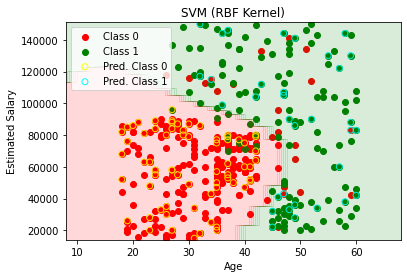

In [4]:
model = create_model(kernel='rbf')
y_prediction, x1, x2, z = create_boundaries(model)

c_param = model.get_params()['C']
kernel_coef_type = model.get_params()['gamma']
b = model.intercept_[0]

print('C parameter: ', c_param)
print('b intercept: ', b)
print('Kernel Coefficient type: ', kernel_coef_type)
print('No. of support vectors', len(model.support_vectors_), '\n')

plt.title('SVM (RBF Kernel)')
create_graph_details(model, y_prediction, x1, x2, z)

## 4b. For linear kernel

C parameter:  1.0
b intercept:  -0.7686216858470426
Eqn: [b0=-0.7686216858470426] + [b1=1.6029129051008992] * x1 + [b2=0.9713872195022688] * x2
No. of support vectors 128
                Pred. Class 0  Pred. Class 1
Actual Class 0             66              2
Actual Class 1              8             24 

Accuracy score: 90.0%


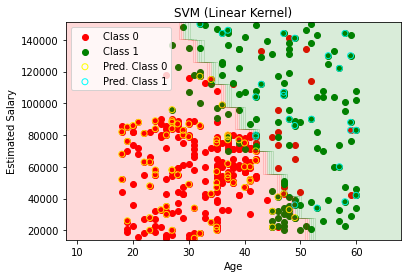

In [5]:
model = create_model(kernel='linear')
y_prediction, x1, x2, z = create_boundaries(model)

c_param = model.get_params()['C']
b = model.intercept_[0]
weights = model.coef_

print('C parameter: ', c_param)
print('b intercept: ', b)
print(f'Eqn: [b0={b}] + [b1={weights[0][0]}] * x1 + [b2={weights[0][1]}] * x2')
print('No. of support vectors', len(model.support_vectors_))

plt.title('SVM (Linear Kernel)')
create_graph_details(model, y_prediction, x1, x2, z)

## 4c. For polynomial kernel

For polynomial gamma, it functions like this `(<gamma> * xi'.xj + 1)^d`

C parameter:  1.0
b intercept:  -0.9919941927871815
Power (degree):  3
Kernel Coefficient type:  scale
No. of support vectors 125
                Pred. Class 0  Pred. Class 1
Actual Class 0             67              1
Actual Class 1             13             19 

Accuracy score: 86.0%


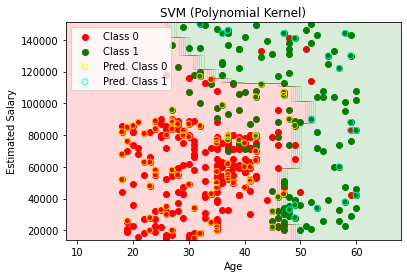

In [6]:
model = create_model(kernel='poly')
y_prediction, x1, x2, z = create_boundaries(model)
degree_power = model.get_params()['degree']
kernel_coef_type = model.get_params()['gamma']
c_param = model.get_params()['C']
b = model.intercept_[0]

print('C parameter: ', c_param)
print('b intercept: ', b)
print('Power (degree): ', degree_power)
print('Kernel Coefficient type: ', kernel_coef_type)
print('No. of support vectors', len(model.support_vectors_))

plt.title('SVM (Polynomial Kernel)')
create_graph_details(model, y_prediction, x1, x2, z)

## 4d. For sigmoid kernel

The gamma is similar to polynomial kernel in terms of the gamma multiplier.

C parameter:  1.0
b intercept:  -0.35597873217568826
Kernel Coefficient type:  scale
No. of support vectors 128
                Pred. Class 0  Pred. Class 1
Actual Class 0             54             14
Actual Class 1             12             20 

Accuracy score: 74.0%


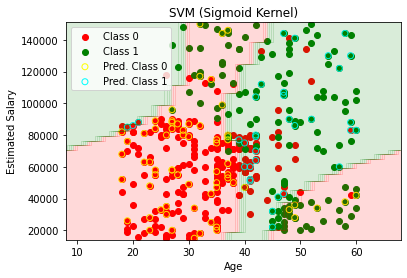

In [7]:
model = create_model(kernel='sigmoid')
y_prediction, x1, x2, z = create_boundaries(model)
kernel_coef_type = model.get_params()['gamma']
c_param = model.get_params()['C']
b = model.intercept_[0]

print('C parameter: ', c_param)
print('b intercept: ', b)
print('Kernel Coefficient type: ', kernel_coef_type)
print('No. of support vectors', len(model.support_vectors_))

plt.title('SVM (Sigmoid Kernel)')
create_graph_details(model, y_prediction, x1, x2, z)